# BGS Signal-to-Noise Ratio and Redshift Efficiency: QA

In [35]:
import os
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table, vstack
from astropy.io import fits
import seaborn as sns
sns.set(style='white', font_scale=1.1, palette='deep')

In [36]:
from desiutil.log import get_logger, DEBUG
log = get_logger()

In [37]:
from desistudy_qa import qa_zmag, qa_efficiency, qa_zwarn4, qa_radec

In [38]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Just a few things we need to define to set things up

In [39]:
sim_names = ['sim01','sim02','sim03','sim04','sim05','sim06','sim07','sim08']

In [40]:
simdir = os.path.join(os.getenv('DESI_ROOT'), 'spectro', 'sim', 'bgs', 'kremin', 'flat_priors')

In [41]:
from desistudy_qa import get_all_sims_obs

sim_names = np.asarray(sim_names)
sims, conditions = get_all_sims_obs(sim_names)

# Analyze the outputs.

Sims 1-4 have magnitude range 17.0-19.5 and z-range 0.1-0.6

Sims 5-8 have magnitude range 19.5-20 and z-range 0.1-0.8



In [42]:
from desistudy_qa import print_file_locations
print_file_locations(simdir,sims)

In /global/project/projectdirs/desi/spectro/sim/bgs/kremin/flat_priors/ :
	In sim01/:
		   bgs-sim01-results.fits
	In sim02/:
		   bgs-sim02-results.fits
	In sim03/:
		   bgs-sim03-results.fits
	In sim04/:
		   bgs-sim04-results.fits
	In sim05/:
		   bgs-sim05-results.fits
	In sim06/:
		   bgs-sim06-results.fits
	In sim07/:
	In sim08/:


## Sim 1

In [43]:
current_sim_name = 'sim01'

In [44]:
from desistudy_qa import print_sim_params
print_sim_params(current_sim_name, sim_names, sims, conditions)

Sim: sim01
	Sim Parameters: 
		suffix: sim01
		use_mock: False
		nsim: 2
		nspec: 4000
		zmin: 0.1
		zmax: 0.6
		rmagmin: 17.0
		rmagmax: 19.5
		seed: 164
	Obs Parameters: 
		AIRMASS: 1.0
		SEEING: 1.1
		MOONALT: -60
		MOONSEP: 180
		EXPTIME: 300
		MOONFRAC: 0.0


Sim: sim01 with nspec: 4000 and nsim: 2
ObsConds ExpTime: 300, MoonFrac: 0.0, MoonAlt: -60, MoonSep: 180


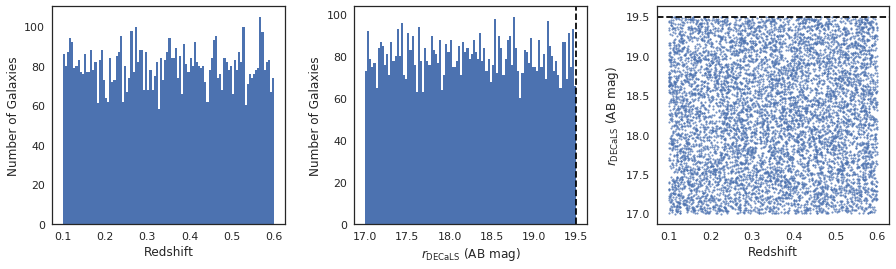

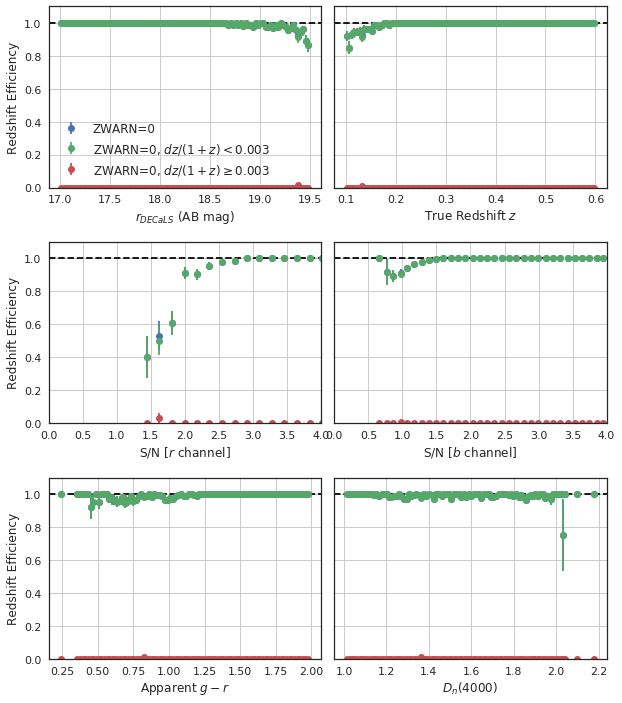

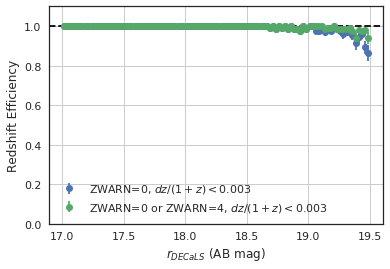

In [45]:
# sim 1
if current_sim_name in sim_names:
    ind = np.where(sim_names==current_sim_name)[0][0]
    sim,obs = sims[ind],conditions[ind]
    
    resultfile = os.path.join(simdir, sim['suffix'], 'bgs-{}-results.fits'.format(sim['suffix']))
    if os.path.exists(resultfile):
        print('Sim: {} with nspec: {} and nsim: {}'.format(sim['suffix'],sim['nspec'],sim['nsim']))

        if 'EXPTIME' in obs.keys(): exptime = "{}".format(obs['EXPTIME'])
        else:                       exptime = "{}-{}".format(obs['exptimemin'],obs['exptimemax'])

        if 'MOONFRAC' in obs.keys(): moonfrac = "{}".format(obs['MOONFRAC'])
        else:                        moonfrac = "{}-{}".format(obs['moonfracmin'],obs['moonfracmax'])

        print('ObsConds ExpTime: {}, MoonFrac: {}, MoonAlt: {}, MoonSep: {}'.format(exptime,moonfrac,obs['MOONALT'],obs['MOONSEP']))
        result = Table.read(resultfile)
        qa_zmag(result['ZTRUE'], result['RMAG'], maglabel=r'$r_{\rm DECaLS}$ (AB mag)', faintmag=19.5)
        qa_efficiency(result)
        qa_zwarn4(result)

## Sim 2

In [46]:
current_sim_name = 'sim02'

In [47]:
print_sim_params(current_sim_name, sim_names, sims, conditions)

Sim: sim02
	Sim Parameters: 
		suffix: sim02
		use_mock: False
		nsim: 2
		nspec: 4000
		zmin: 0.1
		zmax: 0.6
		rmagmin: 17.0
		rmagmax: 19.5
		seed: 328
	Obs Parameters: 
		AIRMASS: 1.0
		SEEING: 1.1
		MOONALT: 30
		MOONSEP: 120
		EXPTIME: 480
		MOONFRAC: 0.8


Sim: sim02 with nspec: 4000 and nsim: 2
ObsConds ExpTime: 480, MoonFrac: 0.8, MoonAlt: 30, MoonSep: 120


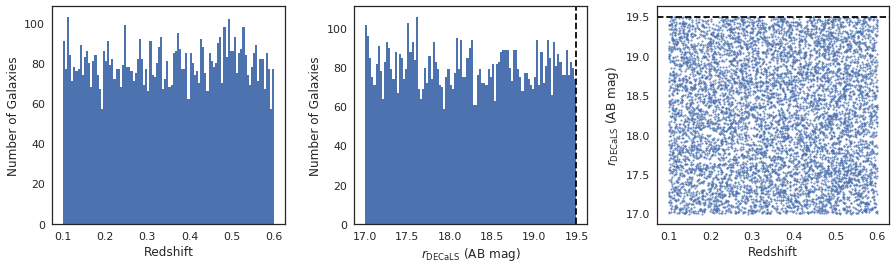

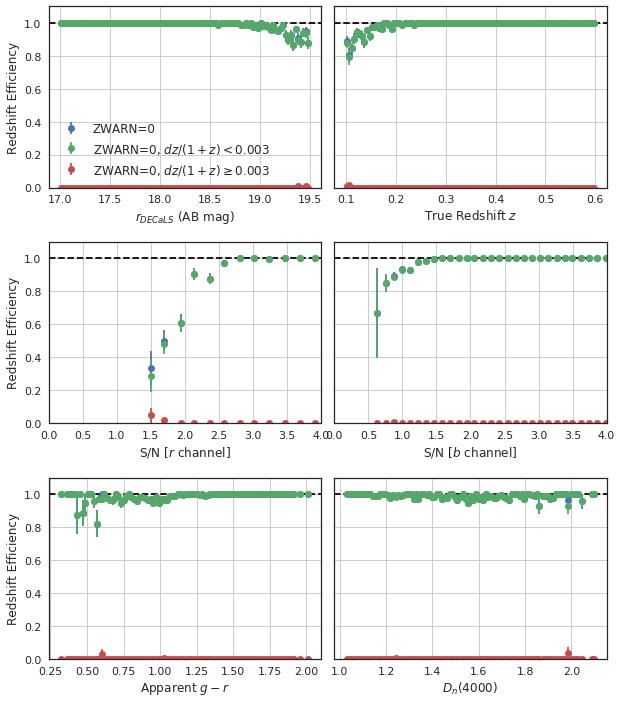

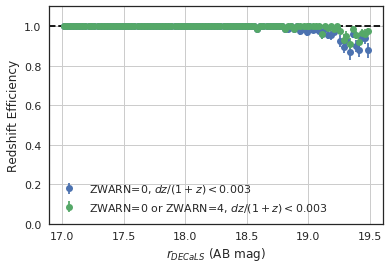

In [48]:
# sim 2
if current_sim_name in sim_names:
    ind = np.where(sim_names==current_sim_name)[0][0]
    sim,obs = sims[ind],conditions[ind]
    
    resultfile = os.path.join(simdir, sim['suffix'], 'bgs-{}-results.fits'.format(sim['suffix']))
    if os.path.exists(resultfile):
        print('Sim: {} with nspec: {} and nsim: {}'.format(sim['suffix'],sim['nspec'],sim['nsim']))

        if 'EXPTIME' in obs.keys(): exptime = "{}".format(obs['EXPTIME'])
        else:                       exptime = "{}-{}".format(obs['exptimemin'],obs['exptimemax'])

        if 'MOONFRAC' in obs.keys(): moonfrac = "{}".format(obs['MOONFRAC'])
        else:                        moonfrac = "{}-{}".format(obs['moonfracmin'],obs['moonfracmax'])

        print('ObsConds ExpTime: {}, MoonFrac: {}, MoonAlt: {}, MoonSep: {}'.format(exptime,moonfrac,obs['MOONALT'],obs['MOONSEP']))
        result = Table.read(resultfile)
        #result.pprint()
        qa_zmag(result['ZTRUE'], result['RMAG'], maglabel=r'$r_{\rm DECaLS}$ (AB mag)', faintmag=19.5)
        qa_efficiency(result)
        qa_zwarn4(result)   

## Sim 3

In [49]:
current_sim_name = 'sim03'

In [50]:
print_sim_params(current_sim_name, sim_names, sims, conditions)

Sim: sim03
	Sim Parameters: 
		suffix: sim03
		use_mock: False
		nsim: 10
		nspec: 1000
		zmin: 0.1
		zmax: 0.6
		rmagmin: 17.0
		rmagmax: 19.5
		seed: 492
	Obs Parameters: 
		AIRMASS: 1.0
		SEEING: 1.1
		MOONALT: 30
		MOONSEP: 120
		exptimemin: 300
		exptimemax: 720
		MOONFRAC: 0.8


Sim: sim03 with nspec: 1000 and nsim: 10
ObsConds ExpTime: 300-720, MoonFrac: 0.8, MoonAlt: 30, MoonSep: 120


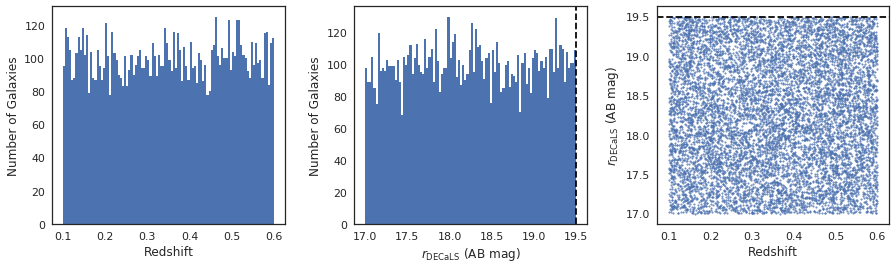

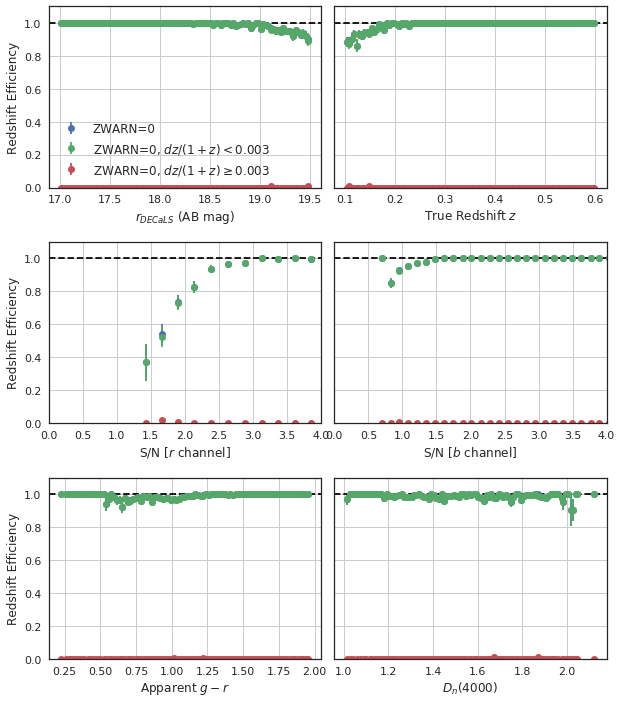

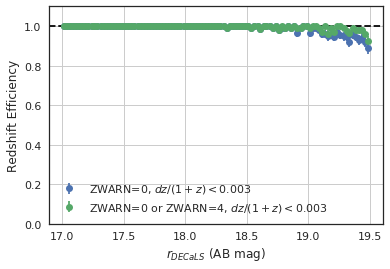

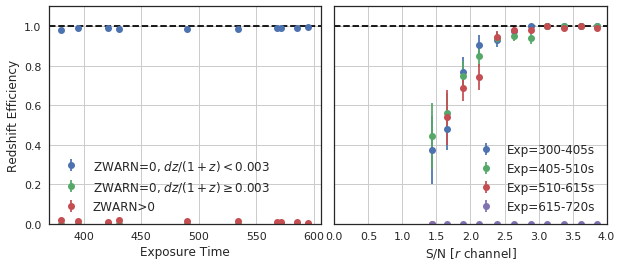

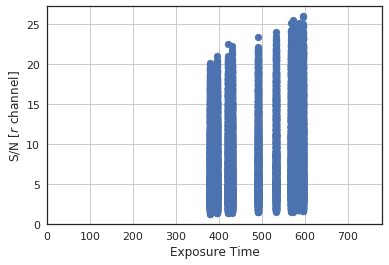

In [51]:
# sim 3
from desistudy_qa import qa_exptime

if current_sim_name in sim_names:
    ind = np.where(sim_names==current_sim_name)[0][0]
    sim,obs = sims[ind],conditions[ind]
    
    resultfile = os.path.join(simdir, sim['suffix'], 'bgs-{}-results.fits'.format(sim['suffix']))
    if os.path.exists(resultfile):
        print('Sim: {} with nspec: {} and nsim: {}'.format(sim['suffix'],sim['nspec'],sim['nsim']))

        if 'EXPTIME' in obs.keys(): exptime = "{}".format(obs['EXPTIME'])
        else:                       exptime = "{}-{}".format(obs['exptimemin'],obs['exptimemax'])

        if 'MOONFRAC' in obs.keys(): moonfrac = "{}".format(obs['MOONFRAC'])
        else:                        moonfrac = "{}-{}".format(obs['moonfracmin'],obs['moonfracmax'])

        print('ObsConds ExpTime: {}, MoonFrac: {}, MoonAlt: {}, MoonSep: {}'.format(exptime,moonfrac,obs['MOONALT'],obs['MOONSEP']))
        result = Table.read(resultfile)
        qa_zmag(result['ZTRUE'], result['RMAG'], maglabel=r'$r_{\rm DECaLS}$ (AB mag)', faintmag=19.5)
        qa_efficiency(result)
        qa_zwarn4(result)
        qa_exptime(result,"zeff_vs_exptime.png")

## Sim 4

In [52]:
current_sim_name = 'sim04'

In [53]:
print_sim_params(current_sim_name, sim_names, sims, conditions)

Sim: sim04
	Sim Parameters: 
		suffix: sim04
		use_mock: False
		nsim: 10
		nspec: 1000
		zmin: 0.1
		zmax: 0.6
		rmagmin: 17.0
		rmagmax: 19.5
		seed: 656
	Obs Parameters: 
		AIRMASS: 1.0
		SEEING: 1.1
		MOONALT: 30
		MOONSEP: 120
		EXPTIME: 600
		moonfracmin: 0.6
		moonfracmax: 0.98


Sim: sim04 with nspec: 1000 and nsim: 10
ObsConds ExpTime: 600, MoonFrac: 0.6-0.98, MoonAlt: 30, MoonSep: 120


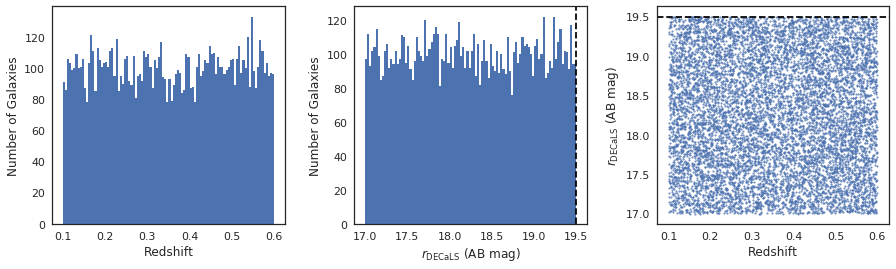

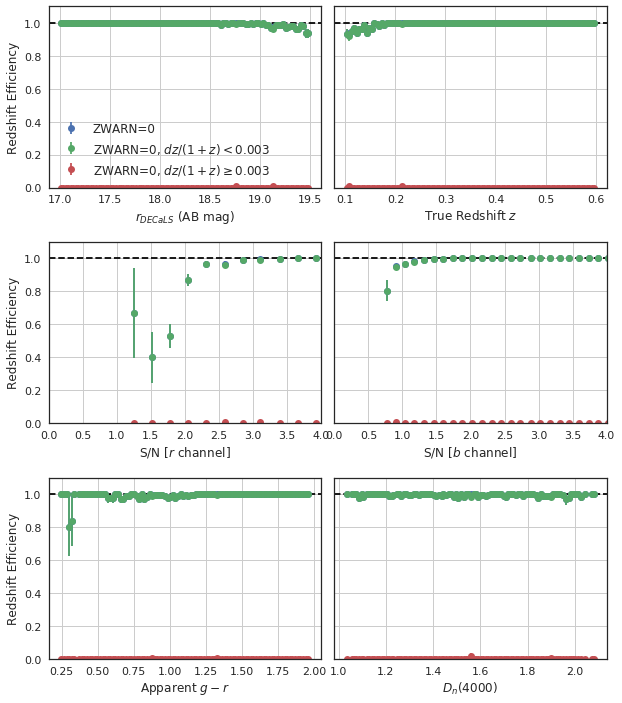

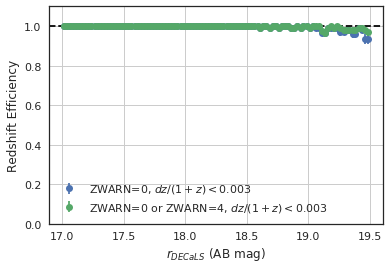

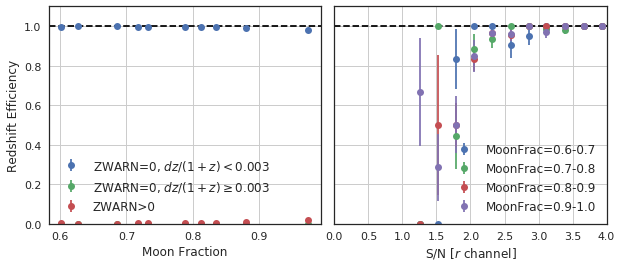

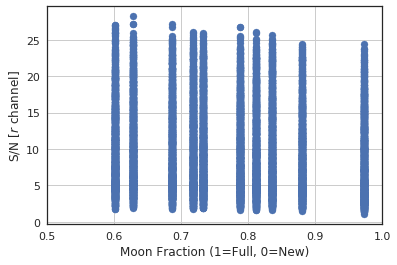

In [54]:
# sim 4
from desistudy_qa import qa_moonfrac

if current_sim_name in sim_names:
    ind = np.where(sim_names==current_sim_name)[0][0]
    sim,obs = sims[ind],conditions[ind]
    
    resultfile = os.path.join(simdir, sim['suffix'], 'bgs-{}-results.fits'.format(sim['suffix']))
    if os.path.exists(resultfile):
        print('Sim: {} with nspec: {} and nsim: {}'.format(sim['suffix'],sim['nspec'],sim['nsim']))

        if 'EXPTIME' in obs.keys(): exptime = "{}".format(obs['EXPTIME'])
        else:                       exptime = "{}-{}".format(obs['exptimemin'],obs['exptimemax'])

        if 'MOONFRAC' in obs.keys(): moonfrac = "{}".format(obs['MOONFRAC'])
        else:                        moonfrac = "{}-{}".format(obs['moonfracmin'],obs['moonfracmax'])

        print('ObsConds ExpTime: {}, MoonFrac: {}, MoonAlt: {}, MoonSep: {}'.format(exptime,moonfrac,obs['MOONALT'],obs['MOONSEP']))
        result = Table.read(resultfile)
        qa_zmag(result['ZTRUE'], result['RMAG'], maglabel=r'$r_{\rm DECaLS}$ (AB mag)', faintmag=19.5)
        qa_efficiency(result)
        qa_zwarn4(result)
        qa_moonfrac(result,"zeff_vs_moonfrac.png")

## Sim 5

In [55]:
current_sim_name = 'sim05'

In [56]:
print_sim_params(current_sim_name, sim_names, sims, conditions)

Sim: sim05
	Sim Parameters: 
		suffix: sim05
		use_mock: False
		nsim: 2
		nspec: 800
		zmin: 0.1
		zmax: 0.8
		rmagmin: 19.5
		rmagmax: 20.0
		seed: 820
	Obs Parameters: 
		AIRMASS: 1.0
		SEEING: 1.1
		MOONALT: -60
		MOONSEP: 180
		EXPTIME: 300
		MOONFRAC: 0.0


Sim: sim05 with nspec: 800 and nsim: 2
ObsConds ExpTime: 300, MoonFrac: 0.0, MoonAlt: -60, MoonSep: 180


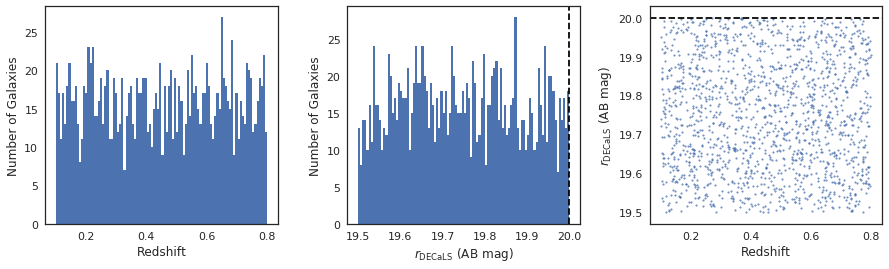

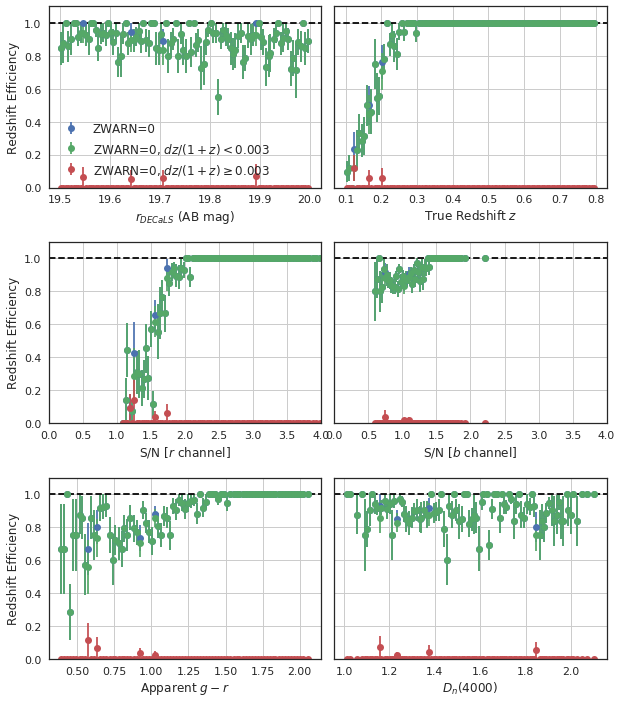

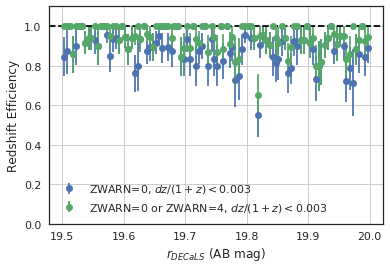

In [57]:
# sim 5
if current_sim_name in sim_names:
    ind = np.where(sim_names==current_sim_name)[0][0]
    sim,obs = sims[ind],conditions[ind]
    
    resultfile = os.path.join(simdir, sim['suffix'], 'bgs-{}-results.fits'.format(sim['suffix']))
    if os.path.exists(resultfile):
        print('Sim: {} with nspec: {} and nsim: {}'.format(sim['suffix'],sim['nspec'],sim['nsim']))

        if 'EXPTIME' in obs.keys(): exptime = "{}".format(obs['EXPTIME'])
        else:                       exptime = "{}-{}".format(obs['exptimemin'],obs['exptimemax'])

        if 'MOONFRAC' in obs.keys(): moonfrac = "{}".format(obs['MOONFRAC'])
        else:                        moonfrac = "{}-{}".format(obs['moonfracmin'],obs['moonfracmax'])

        print('ObsConds ExpTime: {}, MoonFrac: {}, MoonAlt: {}, MoonSep: {}'.format(exptime,moonfrac,obs['MOONALT'],obs['MOONSEP']))
        result = Table.read(resultfile)
        qa_zmag(result['ZTRUE'], result['RMAG'], maglabel=r'$r_{\rm DECaLS}$ (AB mag)', faintmag=20.)
        qa_efficiency(result)
        qa_zwarn4(result)

## Sim 6

In [58]:
current_sim_name = 'sim06'

In [59]:
print_sim_params(current_sim_name, sim_names, sims, conditions)

Sim: sim06
	Sim Parameters: 
		suffix: sim06
		use_mock: False
		nsim: 2
		nspec: 800
		zmin: 0.1
		zmax: 0.8
		rmagmin: 19.5
		rmagmax: 20.0
		seed: 984
	Obs Parameters: 
		AIRMASS: 1.0
		SEEING: 1.1
		MOONALT: 30
		MOONSEP: 120
		EXPTIME: 480
		MOONFRAC: 0.8


Sim: sim06 with nspec: 800 and nsim: 2
ObsConds ExpTime: 480, MoonFrac: 0.8, MoonAlt: 30, MoonSep: 120


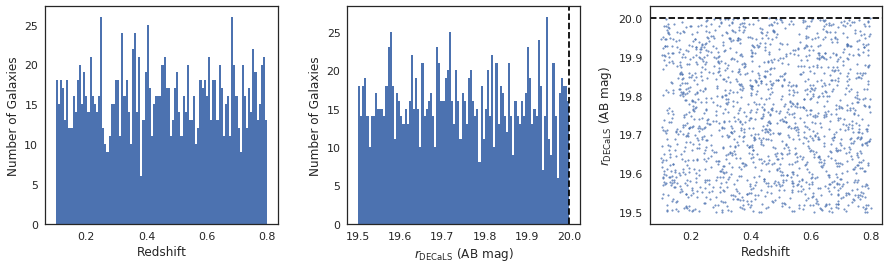

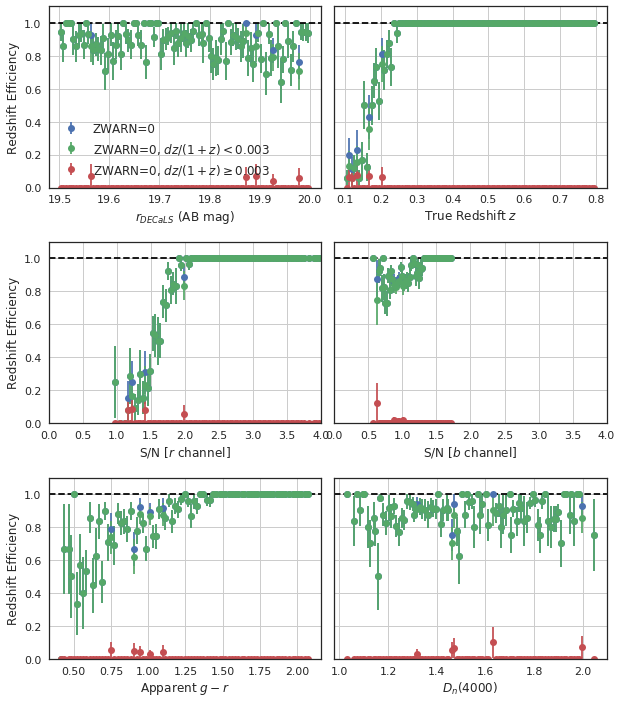

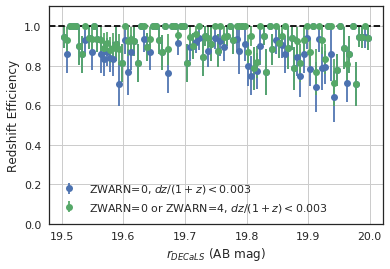

In [60]:
# sim 6
if current_sim_name in sim_names:
    ind = np.where(sim_names==current_sim_name)[0][0]
    sim,obs = sims[ind],conditions[ind]
    
    resultfile = os.path.join(simdir, sim['suffix'], 'bgs-{}-results.fits'.format(sim['suffix']))
    if os.path.exists(resultfile):
        print('Sim: {} with nspec: {} and nsim: {}'.format(sim['suffix'],sim['nspec'],sim['nsim']))

        if 'EXPTIME' in obs.keys(): exptime = "{}".format(obs['EXPTIME'])
        else:                       exptime = "{}-{}".format(obs['exptimemin'],obs['exptimemax'])

        if 'MOONFRAC' in obs.keys(): moonfrac = "{}".format(obs['MOONFRAC'])
        else:                        moonfrac = "{}-{}".format(obs['moonfracmin'],obs['moonfracmax'])

        print('ObsConds ExpTime: {}, MoonFrac: {}, MoonAlt: {}, MoonSep: {}'.format(exptime,moonfrac,obs['MOONALT'],obs['MOONSEP']))
        result = Table.read(resultfile)
        #result.pprint()
        qa_zmag(result['ZTRUE'], result['RMAG'], maglabel=r'$r_{\rm DECaLS}$ (AB mag)', faintmag=20.)
        qa_efficiency(result)
        qa_zwarn4(result)   

## Sim 7

In [61]:
current_sim_name = 'sim07'

In [62]:
print_sim_params(current_sim_name, sim_names, sims, conditions)

Sim: sim07
	Sim Parameters: 
		suffix: sim07
		use_mock: False
		nsim: 10
		nspec: 200
		zmin: 0.1
		zmax: 0.8
		rmagmin: 19.5
		rmagmax: 20.0
		seed: 1148
	Obs Parameters: 
		AIRMASS: 1.0
		SEEING: 1.1
		MOONALT: 30
		MOONSEP: 120
		exptimemin: 300
		exptimemax: 720
		MOONFRAC: 0.8


In [63]:
# sim 7
if current_sim_name in sim_names:
    ind = np.where(sim_names==current_sim_name)[0][0]
    sim,obs = sims[ind],conditions[ind]
    
    resultfile = os.path.join(simdir, sim['suffix'], 'bgs-{}-results.fits'.format(sim['suffix']))
    if os.path.exists(resultfile):
        print('Sim: {} with nspec: {} and nsim: {}'.format(sim['suffix'],sim['nspec'],sim['nsim']))

        if 'EXPTIME' in obs.keys(): exptime = "{}".format(obs['EXPTIME'])
        else:                       exptime = "{}-{}".format(obs['exptimemin'],obs['exptimemax'])

        if 'MOONFRAC' in obs.keys(): moonfrac = "{}".format(obs['MOONFRAC'])
        else:                        moonfrac = "{}-{}".format(obs['moonfracmin'],obs['moonfracmax'])

        print('ObsConds ExpTime: {}, MoonFrac: {}, MoonAlt: {}, MoonSep: {}'.format(exptime,moonfrac,obs['MOONALT'],obs['MOONSEP']))
        result = Table.read(resultfile)
        qa_zmag(result['ZTRUE'], result['RMAG'], maglabel=r'$r_{\rm DECaLS}$ (AB mag)', faintmag=19.5)
        qa_efficiency(result)
        qa_zwarn4(result)
        qa_exptime(result,"zeff_vs_exptime.png")

## Sim 8

In [64]:
current_sim_name = 'sim08'

In [65]:
print_sim_params(current_sim_name, sim_names, sims, conditions)

Sim: sim08
	Sim Parameters: 
		suffix: sim08
		use_mock: False
		nsim: 10
		nspec: 200
		zmin: 0.1
		zmax: 0.8
		rmagmin: 19.5
		rmagmax: 20.0
		seed: 1312
	Obs Parameters: 
		AIRMASS: 1.0
		SEEING: 1.1
		MOONALT: 30
		MOONSEP: 120
		EXPTIME: 600
		moonfracmin: 0.6
		moonfracmax: 0.98


In [66]:
# sim 8
if current_sim_name in sim_names:
    ind = np.where(sim_names==current_sim_name)[0][0]
    sim,obs = sims[ind],conditions[ind]
    
    resultfile = os.path.join(simdir, sim['suffix'], 'bgs-{}-results.fits'.format(sim['suffix']))
    if os.path.exists(resultfile):
        print('Sim: {} with nspec: {} and nsim: {}'.format(sim['suffix'],sim['nspec'],sim['nsim']))

        if 'EXPTIME' in obs.keys(): exptime = "{}".format(obs['EXPTIME'])
        else:                       exptime = "{}-{}".format(obs['exptimemin'],obs['exptimemax'])

        if 'MOONFRAC' in obs.keys(): moonfrac = "{}".format(obs['MOONFRAC'])
        else:                        moonfrac = "{}-{}".format(obs['moonfracmin'],obs['moonfracmax'])

        print('ObsConds ExpTime: {}, MoonFrac: {}, MoonAlt: {}, MoonSep: {}'.format(exptime,moonfrac,obs['MOONALT'],obs['MOONSEP']))
        result = Table.read(resultfile)
        qa_zmag(result['ZTRUE'], result['RMAG'], maglabel=r'$r_{\rm DECaLS}$ (AB mag)', faintmag=19.5)
        qa_efficiency(result)
        qa_zwarn4(result)
        qa_moonfrac(result,"zeff_vs_moonfrac.png")